# Problem set 5

## Name: [TODO]

## Link to your PS5 github repo: [TODO]

## Roughly how much time did you spend on this assignment in hours? [TODO]

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


### Problem 1a (10 points)

Please load the true_labels_pred_probs.csv file from the data folder into a data frame. It contains the true labels and the predicted probabilities of class 0 and 1 in a classification problem. Class 0 indicates a patient does not have a disease, while Class 1 indicates that a patient does have the disease.

Please prepare the predicted classes for a critical probability of 25%, 50%, and 75% and create three confusion matrix plots. Put the critical probability value in the title of each graph. In a paragraph, explain how the model's performance is impacted by the critical probability with respect to the confusion matrices. Given the model's specified deployment task, what are the implications of choosing one of the critical probabilities over the other?

Index(['y_true', 'pred_prob_class0', 'pred_prob_class1'], dtype='object')


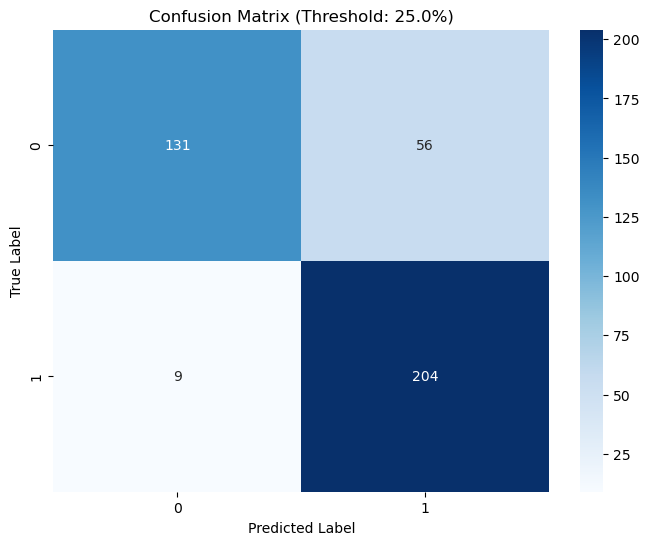

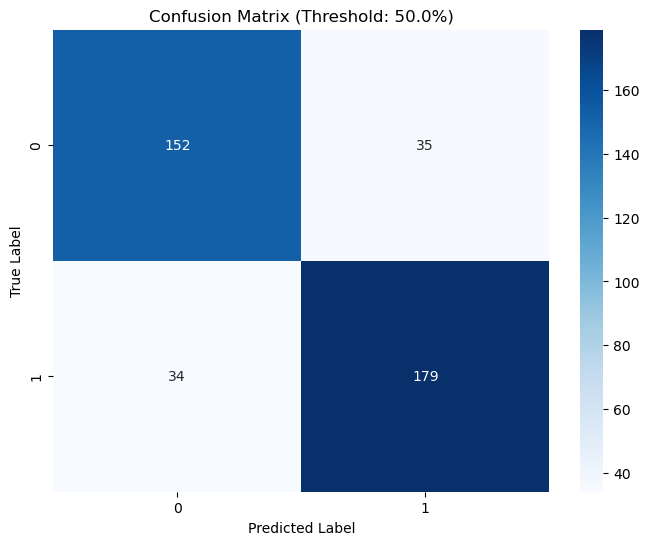

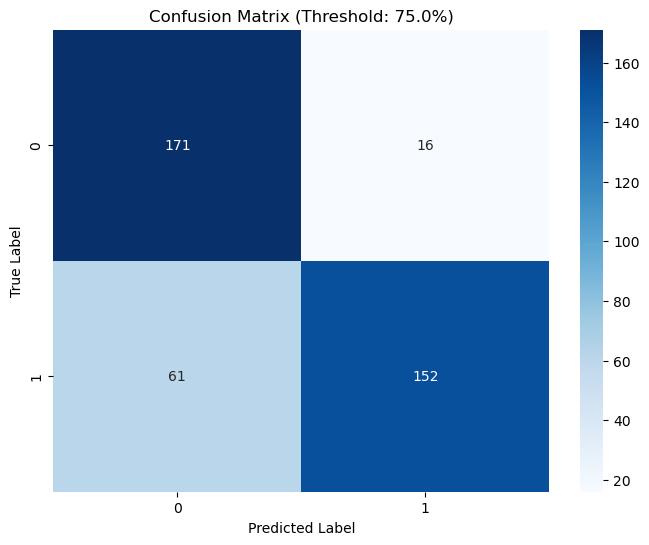

In [13]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

df = pd.read_csv('true_labels_pred_probs.csv')
print(df.columns)

def plot_confusion_matrix(y_true, y_pred, threshold):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold*100}%)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

thresholds = [0.25, 0.50, 0.75]

for threshold in thresholds:
    df[f'pred_class_{threshold}'] = (
        df['pred_prob_class1'] >= threshold
    ).astype(int)
    
    plot_confusion_matrix(
        df['y_true'], 
        df[f'pred_class_{threshold}'], 
        threshold
    )

**your explanation here**
The model's performance changes significantly based on the critical probability threshold, as shown in the confusion matrices for 25%, 50%, and 75%. At the 25% threshold, the model is more likely to classify instances as class 1 (indicating disease), leading to fewer false negatives but more false positives. This would be useful in scenarios where missing a true case is more costly, such as in disease screening, where identifying all potential cases is critical, even at the expense of some false positives. At the 50% threshold, the model achieves a more balanced trade-off between false positives and false negatives, which might serve as a reasonable middle ground for most situations. However, at the 75% threshold, the model becomes stricter, reducing false positives but increasing false negatives, which could be preferable when it's important to minimize unnecessary treatments or false alarms. The choice of threshold depends on the specific goals of deployment: a lower threshold prioritizes sensitivity, while a higher threshold emphasizes specificity. Based on this question, which is to identify disease, I believe a lower threshold like 25% is better because it prioritizes sensitivity, ensuring more cases of the disease are detected, even at the cost of some false positives, which means we want to minimize bottom left. 

### Problem 1b (9 points)

For each critical probability, calculate and plot the accuracy, precision, recall, f0.5, f1, and f1.5 scores using the sorted values from the Class 1 predicted probabilities.

What critical probability maximizes each of the scores (one critical probability per score)? That critical probability is what you should use to maximize the scores.

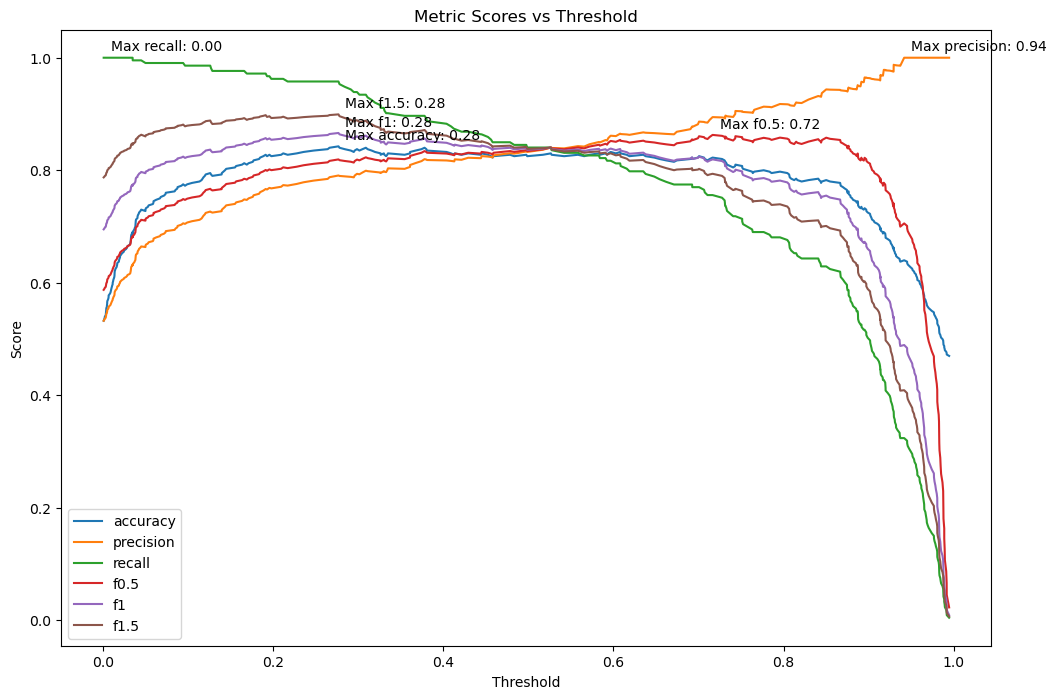

Optimal threshold for accuracy: 0.2768
Optimal threshold for precision: 0.9417
Optimal threshold for recall: 0.0009
Optimal threshold for f0.5: 0.7165
Optimal threshold for f1: 0.2768
Optimal threshold for f1.5: 0.2768


In [14]:
# your code here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

df = pd.read_csv('true_labels_pred_probs.csv')
sorted_indices = df['pred_prob_class1'].argsort()
y_true = df['y_true'].iloc[sorted_indices].values
y_prob = df['pred_prob_class1'].iloc[sorted_indices].values
thresholds = np.unique(y_prob)
metrics = {
    'accuracy': [], 'precision': [], 'recall': [],
    'f0.5': [], 'f1': [], 'f1.5': []
}

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    metrics['accuracy'].append(accuracy_score(y_true, y_pred))
    metrics['precision'].append(precision_score(y_true, y_pred))
    metrics['recall'].append(recall_score(y_true, y_pred))
    metrics['f0.5'].append(fbeta_score(y_true, y_pred, beta=0.5))
    metrics['f1'].append(fbeta_score(y_true, y_pred, beta=1))
    metrics['f1.5'].append(fbeta_score(y_true, y_pred, beta=1.5))

plt.figure(figsize=(12, 8))
for metric, values in metrics.items():
    plt.plot(thresholds, values, label=metric)
    max_index = np.argmax(values)
    plt.annotate(f'Max {metric}: {thresholds[max_index]:.2f}',
                 xy=(thresholds[max_index], values[max_index]),
                 xytext=(5, 5), textcoords='offset points')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metric Scores vs Threshold')
plt.legend()
plt.show()

for metric, values in metrics.items():
    print(f"Optimal threshold for {metric}: {thresholds[np.argmax(values)]:.4f}")

### Problem 1c (3 points)

One of the curves you plotted is non-decreasing and another curve is non-increasing. Which evaluation metrics correspond to these two curves and why is this a problem when you try to tune the critical probability? Explain your answer in a few sentences.


**your explanation here**
The precision curve rises while the recall curve falls as the threshold increases, creating a trade-off. This makes it impossible to find one threshold that maximizes both metrics. This hard situation forces us to focus more on either minimizing false positives (high precision) or false negatives (high recall) based on the specific needs of our application. This trade-off is evidence of why we often use balanced metrics like F1 score or adjust our approach depending on whether precision or recall is more critical for the task at hand. No method can reach two optimal simultaneously. 

### Problem 2a (5 points)

Work with true_labels_pred_probs.csv again. 

Calculate the points on the ROC curve and plot it. 

Print out the best critical probability by finding the point on the ROC curve that's closest to the perfect classifier (0,1) point. 

Check out the wikipedia page of the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations) to read more about other ways to determine the best critical probability, and other ways to summarize the ROC curve.

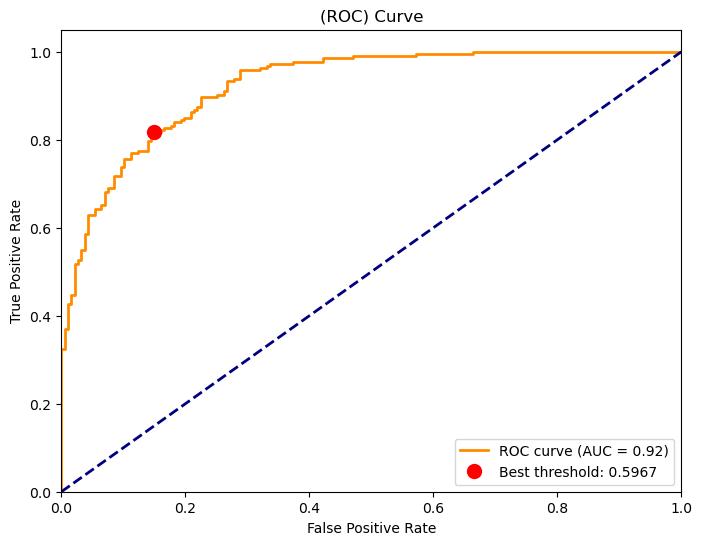

Best critical probability: 0.5967
This corresponds to FPR: 0.1497, TPR: 0.8169
there are three different method, one is Youdens J statistic, which selects the threshold that maximizes the difference between sensitivity and false positive rate. Another common approach is using the Area Under the Curve we learned from class, which summarizes the ROC curves overall performance. Additionally, cost-benefit analysis can guide threshold selection by considering the specific costs of false positives and false negatives in the context, such as healthcare.


In [15]:
# your code here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('true_labels_pred_probs.csv')
fpr, tpr, thresholds = roc_curve(df['y_true'], df['pred_prob_class1'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")

#calculate the best intercetion
distances = np.sqrt(fpr**2 + (1-tpr)**2)
best_idx = np.argmin(distances)
best_threshold = thresholds[best_idx]
plt.plot(fpr[best_idx], tpr[best_idx], 'ro', markersize=10, 
         label=f'Best threshold: {best_threshold:.4f}')
plt.legend(loc="lower right")
plt.show()

print(f"Best critical probability: {best_threshold:.4f}")
print(f"This corresponds to FPR: {fpr[best_idx]:.4f}, TPR: {tpr[best_idx]:.4f}")
print(f'there are three different method, one is Youdens J statistic, which selects '
      f'the threshold that maximizes the difference between sensitivity and false '
      f'positive rate. Another common approach is using the Area Under the Curve '
      f'we learned from class, which summarizes the ROC curves overall performance. '
      f'Additionally, cost-benefit analysis can guide threshold selection by '
      f'considering the specific costs of false positives and false negatives '
      f'in the context, such as healthcare.')

### Problem 2b (10 points)

We discussed in class that the baseline accuracy of a classification model is equal to the fraction of points that belong to the most populous class. For example, if 80% of points belong to class 0 and 20% of points belong to class 1, we could predict class 0 for all points and the accuracy of our model would be 80%. In general, the baseline score is the best score you can achieve knowing no additional information about the features. You use information about your target variable only (in this case, only what percent of points are in each class). Keep this concept and methodology in mind and answer the questions below.

Q1: How would you calculate the baseline f1 score in classification? Let's assume $n_0$ points are in class 0 and $n_1 = n - n_0$ points are in class 1 where $n$ is the number of points in your dataset, and $n_0 > n_1$ so class 1 is the minority class. Work out the solution on pen and paper. Include your logic below and express the f1 score using $p$ and/or $r$.

**your explanation here**
To calculate the baseline F1 score, if I predict only the majority class (class 0), there are no predictions for the minority class (class 1). As a result, the precision for class 1 is zero because no true positives exist. Since class 1 is also zero, as no actual class 1 instances are predicted correctly. So both precision and recall for class 1 are zero, the F1 score, which is the harmonic mean of precision and recall, is also zero. This means the model completely ignores the minority class, focusing only on the majority class.
Precision (p) = TP / (TP + FP) = 0 / 0 (undefined, treated as 0)
Recall (r) = TP / (TP + FN) = 0 / n1 = 0
F1 = 2 * (p * r) / (p + r) = 2 * (0 * 0) / (0 + 0) = 0/0 (undefined, treated as 0 in classification metrics)
Where TP is True Positives, FP is False Positives, FN is False Negatives, and n1 is the number of actual class 1 instances.

Q2: Generalize your Q1 solution to the f_beta score. Usually the f_beta score is used when the classification problem is imbalanced. Prepare a figure which shows the baseline f_beta score for beta = 0.5, 1, and 2 when the fraction of points that belong to class 0 is between 0.95 and 1 in the target variable. Use 51 linearly spaced values between 0.95 and 1.
Create a plot with three curves, one curve per beta value. Don't forget to add axes labels, a title, and a legend.

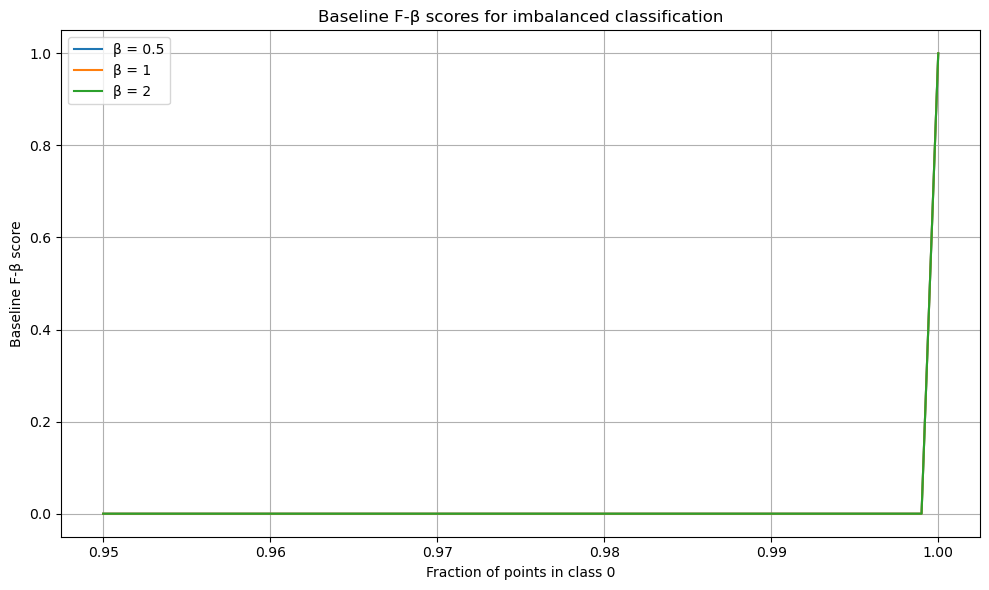

In [16]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score

def calculate_fbeta_baseline(fraction_class_0, beta):
    n_samples = 10000
    y_true = np.random.choice([0, 1], size=n_samples, 
                              p=[fraction_class_0, 1-fraction_class_0])
    y_pred = np.zeros_like(y_true)
    
    # Use zero_division parameter to handle cases with no positive samples
    return fbeta_score(y_true, y_pred, beta=beta, average='binary', zero_division=1.0)

# Generate 51 linearly spaced values between 0.95 and 1
fractions = np.linspace(0.95, 1, 51)
betas = [0.5, 1, 2]

results = {beta: [calculate_fbeta_baseline(f, beta) for f in fractions] for beta in betas}

plt.figure(figsize=(10, 6))
for beta, scores in results.items():
    plt.plot(fractions, scores, label=f'β = {beta}')

plt.xlabel('Fraction of points in class 0')
plt.ylabel('Baseline F-β score')
plt.title('Baseline F-β scores for imbalanced classification')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Problem 2c (10 points)

So far, we've discussed calculating f1 scores in binary classification problems. However, for multiclass problems, there are multiple ways to calculate an f1 score. Look up three different approaches and explain how to calculate them in a short description with equations. Create a simple toy dataset and calculate the f1 scores using sklearn. Discuss the pros and cons of each approach.

**your explanation here**
Micro-averaged F1 can be used for imbalance class and is useful for calculating overall performance, but it may have poor results on minority classes. Macro-averaged F1, on the other hand, treats all classes equally and highlights performance on minority classes, though it can be skewed by rare class performance. Weighted F1 strikes a balance between micro and macro approaches by considering both class importance and frequency, but it may still underrepresent minority classes compared to the macro method.

In [9]:
# your code here
import numpy as np
from sklearn.metrics import f1_score

# Toy dataset
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0])
y_pred = np.array([0, 2, 1, 0, 2, 1, 0, 1, 1, 1])

f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"Micro-averaged F1: {f1_micro:.3f}")
print(f"Macro-averaged F1: {f1_macro:.3f}")
print(f"Weighted F1: {f1_weighted:.3f}")

Micro-averaged F1: 0.400
Macro-averaged F1: 0.369
Weighted F1: 0.418


### Problem 3 (5 points)

The true and predicted target variables of a regression problem are available in the `data/reg.cvs`. The goal of the model is to predict people's ages so the target variable's unit is year. 

We discussed the R2 score in class:

$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,
where $\bar{y}$ is the mean of $y$.

The baseline (or constant) regression model returns the mean of $y$ as prediction for all data points ($y_i' == \bar{y}$ for all $i$). So the baseline R2 score is 0.

Calculate and print the baseline R2, MSE, RMSE, and MAE, **assuming that $y_i' == \bar{y}$ for all $i$**. Make sure to include the units for each metric. 

Next, calculate and print the R2 score, MSE, RMSE, and MAE **using the model predictions** and add the units of the metrics.

In [10]:
# your code here
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv('reg.csv')

print("Available columns:", df.columns.tolist())

y_true = df.iloc[:, 0]
y_pred = df.iloc[:, 1]

y_mean = y_true.mean()

def print_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"R2: {r2:.4f}")
    print(f"MSE: {mse:.4f} years²")
    print(f"RMSE: {rmse:.4f} years")
    print(f"MAE: {mae:.4f} years\n")

print_metrics(y_true, [y_mean] * len(y_true), "Baseline")

print_metrics(y_true, y_pred, "Model")

Available columns: ['y_true', 'y_pred']
Baseline Metrics:
R2: 0.0000
MSE: 589.1229 years²
RMSE: 24.2719 years
MAE: 21.3478 years

Model Metrics:
R2: 0.8599
MSE: 82.5107 years²
RMSE: 9.0835 years
MAE: 7.2112 years



### Problem 4 (optional for extra credit - max 5 points)

Come up with a new question on a concept you struggled with and provide the solution. The question can be conceptual or coding.

In [12]:
print(f'A question I had trouble with was: How does changing the beta value in the F-beta score affect its use in imbalanced classification problems?After searching on internet, i got the answer. The beta value controls the balance between precision and recall. When beta is less than 1 (like F0.5), it favors precision, which is useful when false positives are more harmful, such as in spam detection where you don’t want to mistakenly label real emails as spam. A beta value greater than 1 (like F2) emphasizes recall, which is helpful when false negatives are a bigger issue, such as in detecting rare diseases, where it’s more important to catch all potential cases. This balance helps in picking the right metric for different problems. In summary, at least based on my current knowledge, in data science, there is no perfect metric.')

A question I had trouble with was: How does changing the beta value in the F-beta score affect its use in imbalanced classification problems?After searching on internet, i got the answer. The beta value controls the balance between precision and recall. When beta is less than 1 (like F0.5), it favors precision, which is useful when false positives are more harmful, such as in spam detection where you don’t want to mistakenly label real emails as spam. A beta value greater than 1 (like F2) emphasizes recall, which is helpful when false negatives are a bigger issue, such as in detecting rare diseases, where it’s more important to catch all potential cases. This balance helps in picking the right metric for different problems. In summary, at least based on my current knowledge, in data science, there is no perfect metric.
